In [5]:
# Run this cell to import packages.
import nltk
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import w3_unittest

from utils import get_vectors

In [6]:
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RANI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\RANI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [7]:
import nltk
import pickle
from gensim.models import KeyedVectors

# Download punkt if missing
nltk.download('punkt')
nltk.download('punkt_tab')  # required for newer NLTK

# Load GoogleNews vectors (must be in same folder)
embeddings = KeyedVectors.load_word2vec_format(
    './GoogleNews-vectors-negative300.bin.gz',
    binary=True
)

# Load capitals text file
f = open('./data/capitals.txt', 'r').read()

# Tokenize capital words
set_words = set(nltk.word_tokenize(f))

# Add custom selected words
select_words = [
    'king', 'queen', 'oil', 'gas', 'happy', 'sad',
    'city', 'town', 'village', 'country', 'continent',
    'petroleum', 'joyful'
]

for w in select_words:
    set_words.add(w)

def get_word_embeddings(embeddings):
    word_embeddings = {}

    # Modern Gensim uses embeddings.key_to_index instead of vocab
    for word in embeddings.key_to_index:
        if word in set_words:
            word_embeddings[word] = embeddings[word]

    return word_embeddings

# Testing function
word_embeddings = get_word_embeddings(embeddings)
print(len(word_embeddings))

# Save subset to pickle file
pickle.dump(word_embeddings, open("word_embeddings_subset.p", "wb"))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RANI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\RANI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


243


### 
✔ Load the subset embeddings
✔ Convert to matrix
✔ Apply PCA
✔ Visualize in 2D scatter plot
✔ Label the words

### 1. Load the Saved Word Embeddings

In [8]:
import pickle
import numpy as np

# load the saved subset
word_embeddings = pickle.load(open("word_embeddings_subset.p", "rb"))

print("Words loaded:", len(word_embeddings))


Words loaded: 243


#### 2. Convert Embeddings to a Matrix

In [12]:
# convert word_embeddings dictionary → matrix & word list
words = list(word_embeddings.keys())
X = np.array([word_embeddings[w] for w in words])

print("Matrix shape:", X.shape)  # (num_words, 300)


Matrix shape: (243, 300)


#### 3. Use Your PCA Function and Visualize with Matplotlib

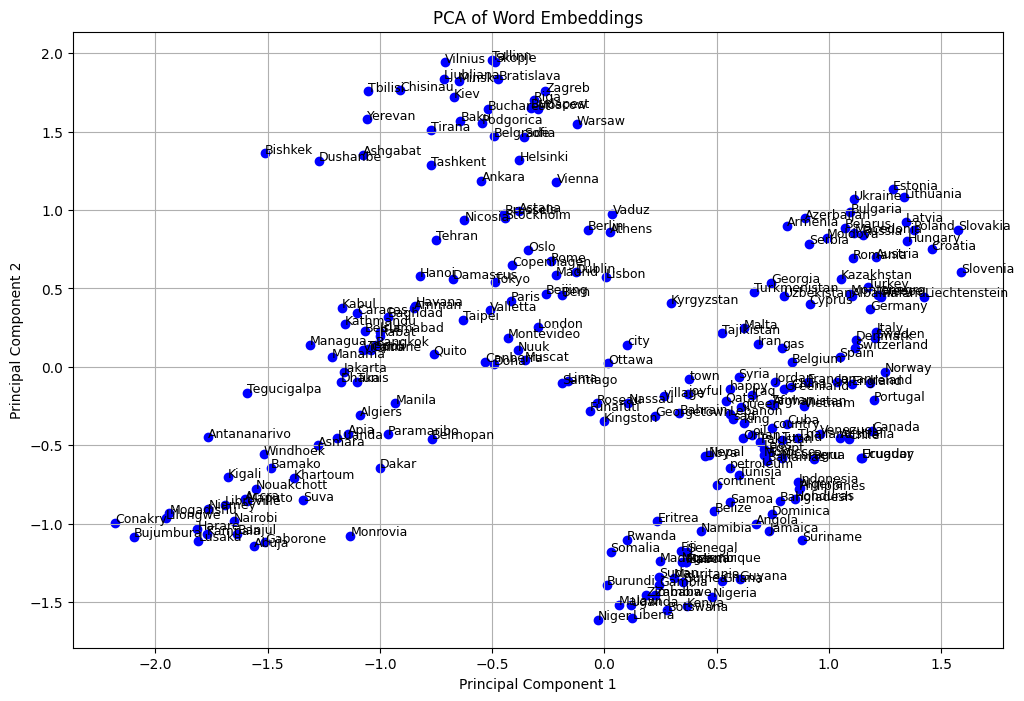

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)       
X_pca = pca.fit_transform(X)
# Plot the PCA results
plt.figure(figsize=(12, 8)) 
plt.scatter(X_pca[:, 0], X_pca[:, 1], color='blue')
for i, word in enumerate(words):
    plt.text(X_pca[i, 0], X_pca[i, 1], word, fontsize=9)
plt.title('PCA of Word Embeddings')
plt.xlabel('Principal Component 1') 
plt.ylabel('Principal Component 2')
plt.grid()  
plt.show()

